
[Overall](#Overall)

[DBSS](#DBSS)

In [1]:
import os, sys
import re, json
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

import matplotlib
matplotlib.style.use('ggplot')

%matplotlib inline
pd.set_option('display.max_columns',300)
pd.set_option('display.max_rows',2000)

from utils import *

In [2]:
hdb = pd.read_excel('./output/HDB_resale_prices.xlsx')

In [3]:
hdb = preprocessHDBdf(hdb)

In [4]:
hdb.shape

(21340, 21)

In [5]:
hdb.columns

Index(['Town', 'Room Type', 'Block', 'Street', 'Storey',
       'Lease Commencement Date', 'Remaining Lease',
       'Resale Registration Date', 'Price', 'Sqm', 'Remaining Lease (Year)',
       'Remaining Lease (Month)', 'Remaining Lease in Months',
       'Floor Area Sqm', 'Model Type', 'Town Name', 'Floor Area Sqft',
       'Price per Sqm', 'Price per Sqft',
       'Price per Sqft per Remaining Lease year', 'Storey Range + Room Type'],
      dtype='object')

In [6]:
hdb.head()

,Town,Room Type,Block,Street,Storey,Lease Commencement Date,Remaining Lease,Resale Registration Date,Price,Sqm,Remaining Lease (Year),Remaining Lease (Month),Remaining Lease in Months,Floor Area Sqm,Model Type,Town Name,Floor Area Sqft,Price per Sqm,Price per Sqft,Price per Sqft per Remaining Lease year,Storey Range + Room Type
10264,KWN Kallang/Whampoa,4-Room,815,Jellicoe Rd,16 to 18,2003,82 years,Apr 2020,720000.0,91.00\nModel A,82,0,984,91.0,Model A,Kallang/Whampoa,979.524,7912.087912,735.050902,8.964035,16 to 18 4-Room
7731,HG Hougang,5-Room,956,Hougang St 91,04 to 06,1999,78 years\n2 months,Apr 2020,517000.0,115.00\nImproved,78,2,938,115.0,Improved,Hougang,1237.860,4495.652174,417.656278,5.343151,04 to 06 5-Room
7730,HG Hougang,5-Room,956,Hougang St 91,10 to 12,1999,78 years\n2 months,Apr 2020,482000.0,116.00\nImproved,78,2,938,116.0,Improved,Hougang,1248.624,4155.172414,386.024936,4.938485,10 to 12 5-Room
7729,HG Hougang,5-Room,929,Hougang St 91,13 to 15,1998,77 years\n3 months,Apr 2020,533888.0,120.00\nImproved,77,3,927,120.0,Improved,Hougang,1291.680,4449.066667,413.328379,5.350529,13 to 15 5-Room
7728,HG Hougang,5-Room,925,Hougang St 91,10 to 12,1998,77 years\n6 months,Apr 2020,488000.0,120.00\nImproved,77,6,930,120.0,Improved,Hougang,1291.680,4066.666667,377.802552,4.874872,10 to 12 5-Room


<a id='Overall'>Overall</a>

## Resale Volume

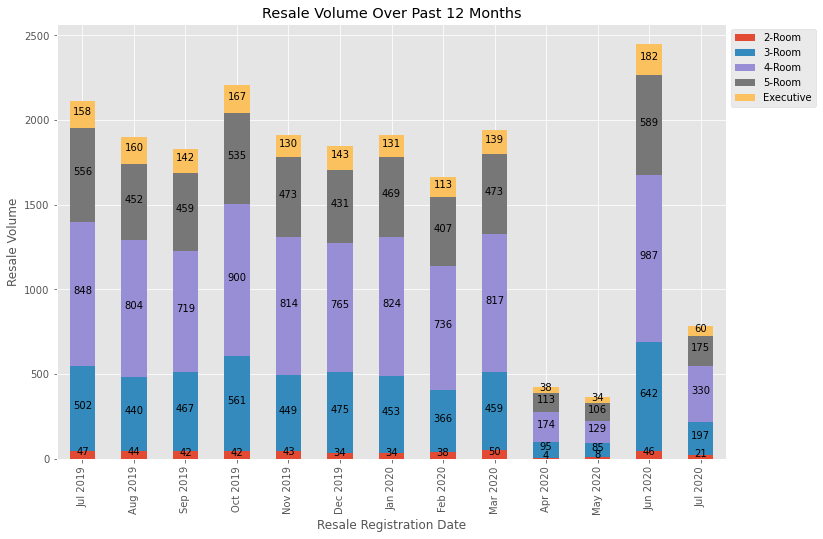

In [84]:
hdb_vol = hdb[hdb['Room Type'].isin(['2-Room','3-Room','4-Room','5-Room','Executive'])].groupby(['Resale Registration Date','Room Type']).agg({'Town':'count'}).unstack('Room Type').fillna(0).reset_index()
hdb_vol.columns = ['Resale Registration Date','2-Room','3-Room','4-Room','5-Room','Executive']
hdb_vol['Resale Registration Date'] =  pd.to_datetime(hdb_vol['Resale Registration Date'], format='%b %Y')
hdb_vol = hdb_vol.sort_values(by=['Resale Registration Date'], ascending=True)
hdb_vol['Resale Registration Date'] = hdb_vol['Resale Registration Date'].apply(lambda x: datetime.strftime(x, '%b %Y'))
hdb_vol.set_index(['Resale Registration Date'], inplace=True)
ax = hdb_vol.plot(kind='bar', stacked=True, figsize=(12,8), title='Resale Volume Over Past 12 Months')
ax.legend(bbox_to_anchor=(1, 1))
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    if height > 0 and height < np.inf:
        ax.annotate(int(round(height)),\
                    (x+width/2, y+height/2),\
                    ha='center', va='center', xytext=(0, 3), textcoords='offset points')
ax.set_ylabel('Resale Volume')
plt.show()

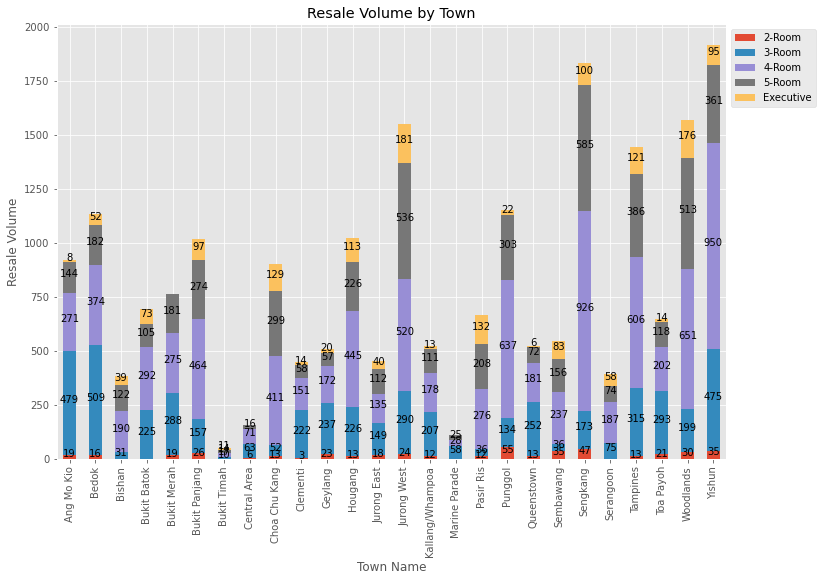

In [83]:
hdb_vol = hdb[hdb['Room Type'].isin(['2-Room','3-Room','4-Room','5-Room','Executive'])].\
groupby(['Town Name','Room Type']).agg({'Town':'count'}).unstack('Room Type').fillna(0).reset_index()
hdb_vol.columns = ['Town Name','2-Room','3-Room','4-Room','5-Room','Executive']
ax = hdb_vol.plot(kind='bar', stacked=True, figsize=(12,8), x='Town Name', title='Resale Volume by Town')
ax.legend(bbox_to_anchor=(1, 1))
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    if height > 0 and height < np.inf:
        ax.annotate(int(round(height)),\
                    (x+width/2, y+height/2),\
                    ha='center', va='center', xytext=(0, 3), textcoords='offset points')
ax.set_ylabel('Resale Volume')
plt.show()

## Price Distribution

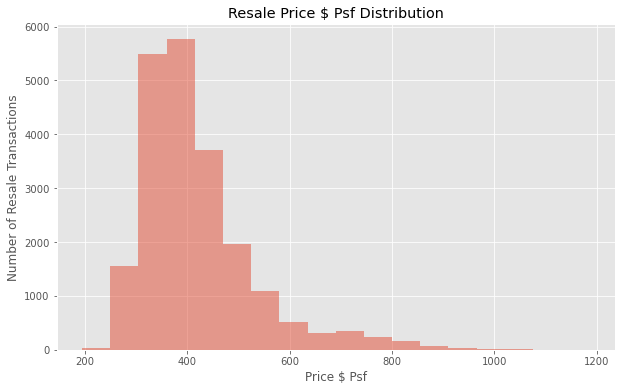

In [17]:
ax = hdb['Price per Sqft'].plot.hist(bins=18, alpha=0.5, figsize=(10,6), title='Resale Price $ Psf Distribution')
ax.set_xlabel('Price $ Psf')
ax.set_ylabel('Number of Resale Transactions')
plt.show()

(0.0, 21340.0)

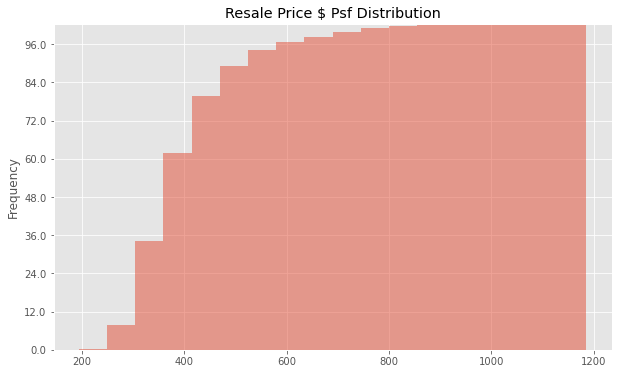

In [58]:
ax1 = hdb['Price per Sqft'].plot.hist(bins=18, alpha=0.5, figsize=(10,6), title='Resale Price $ Psf Distribution', cumulative = True)
ax1.set_yticklabels(np.arange(0,(hdb.shape[0]+1)/hdb.shape[0]*100, round(1/8*100)))
ax1.set_ylim(0,hdb.shape[0])

In [49]:
np.arange(0,(hdb.shape[0]+1)/hdb.shape[0]*100,9)

array([ 0.,  9., 18., 27., 36., 45., 54., 63., 72., 81., 90., 99.])

## HDB Median Prices and Volume

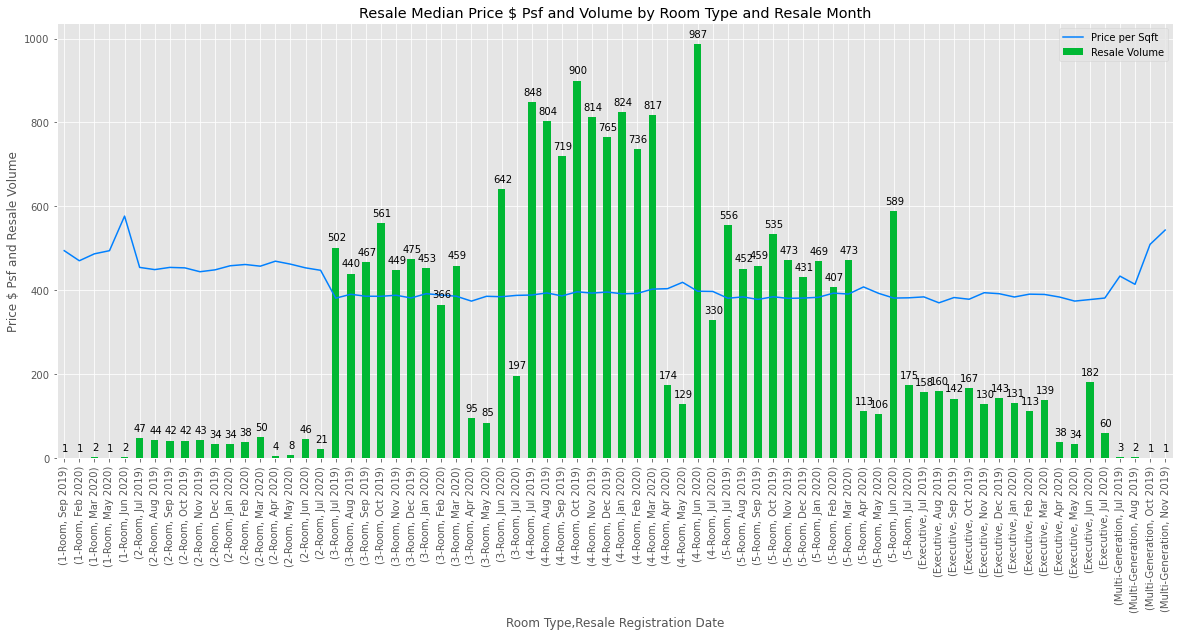

In [76]:
hdb_median_prices_bytime = hdb.groupby(['Room Type','Resale Registration Date']).agg({'Price per Sqft':'median'}).reset_index()
hdb_median_prices_bytime['Resale Registration Date'] =  pd.to_datetime(hdb_median_prices_bytime['Resale Registration Date'], format='%b %Y')
hdb_median_prices_bytime = hdb_median_prices_bytime.sort_values(by=['Room Type','Resale Registration Date'], ascending=True)
hdb_median_prices_bytime['Resale Registration Date'] = hdb_median_prices_bytime['Resale Registration Date'].apply(lambda x: datetime.strftime(x, '%b %Y'))
hdb_median_prices_bytime.set_index(['Room Type','Resale Registration Date'], inplace=True)

hdb_vol_bytime = hdb.groupby(['Room Type','Resale Registration Date']).agg({'Town':'count'}).reset_index()
hdb_vol_bytime.columns = ['Room Type','Resale Registration Date','Resale Volume']
hdb_vol_bytime['Resale Registration Date'] =  pd.to_datetime(hdb_vol_bytime['Resale Registration Date'], format='%b %Y')
hdb_vol_bytime = hdb_vol_bytime.sort_values(by=['Room Type','Resale Registration Date'], ascending=True)
hdb_vol_bytime['Resale Registration Date'] = hdb_vol_bytime['Resale Registration Date'].apply(lambda x: datetime.strftime(x, '%b %Y'))
hdb_vol_bytime.set_index(['Room Type','Resale Registration Date'], inplace=True)


ax = hdb_median_prices_bytime.plot(kind='line', figsize=(20,8), color = '#0080FF')
ax1 = hdb_vol_bytime.plot(kind='bar', figsize=(20,8), color = '#00b834', ax = ax)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    if height > 0 and height < np.inf:
        ax.annotate(int(round(height)),\
                    (x+width, y+height),\
                    ha='center', va='center', xytext=(-3, 10), textcoords='offset points')
ax.set_title('Resale Median Price $ Psf and Volume by Room Type and Resale Month')
ax.set_ylabel('Price $ Psf and Resale Volume')
plt.show()

## Resale Median Prices psf over the past 12 months by Town

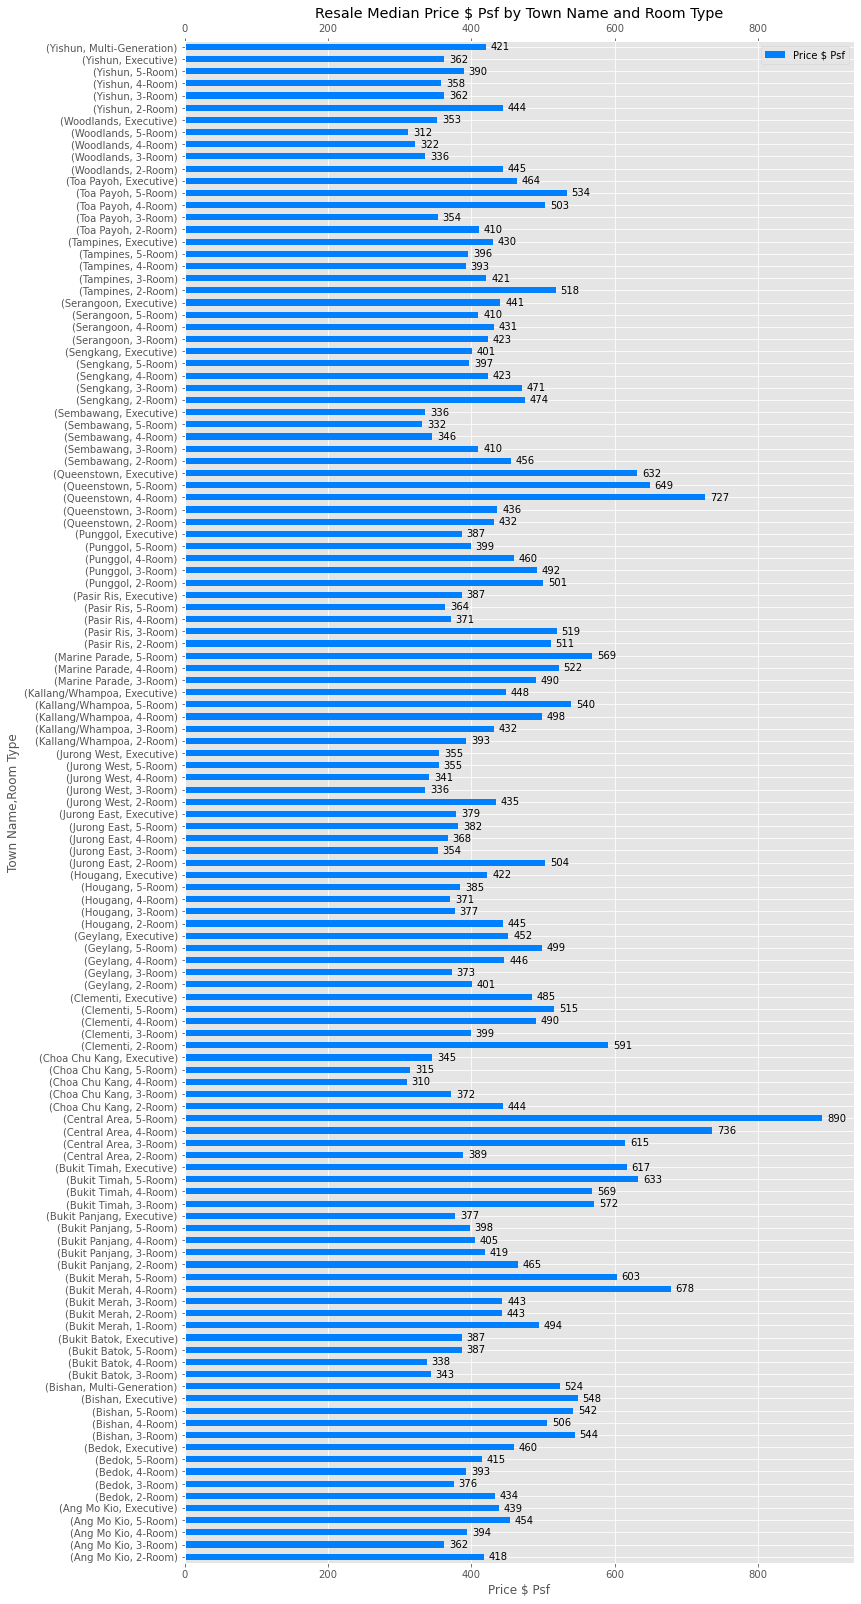

In [81]:
hdb_median_prices = hdb.groupby(['Town Name','Room Type']).agg({'Price per Sqft':'median'})
ax = hdb_median_prices.plot(kind = 'barh', figsize=(12,28), color='#0080FF')
# plt.suptitle(f"Median Price psf by Town", fontsize=18)
ax.set_xlabel("Price $ Psf", fontsize=12)
ax.set_title(f'Resale Median Price $ Psf by Town Name and Room Type')
ax.tick_params(axis="x", bottom=True, top=True, labelbottom=True, labeltop=True)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    if width > 0 and width < np.inf:
        ax.annotate(int(round(width)),\
                    (x+width+20, y),\
                    ha='center', va='center', xytext=(0, 3), textcoords='offset points')

ax.legend(['Price $ Psf'])
plt.show()

## Price per Sqft per Remaining Lease Year

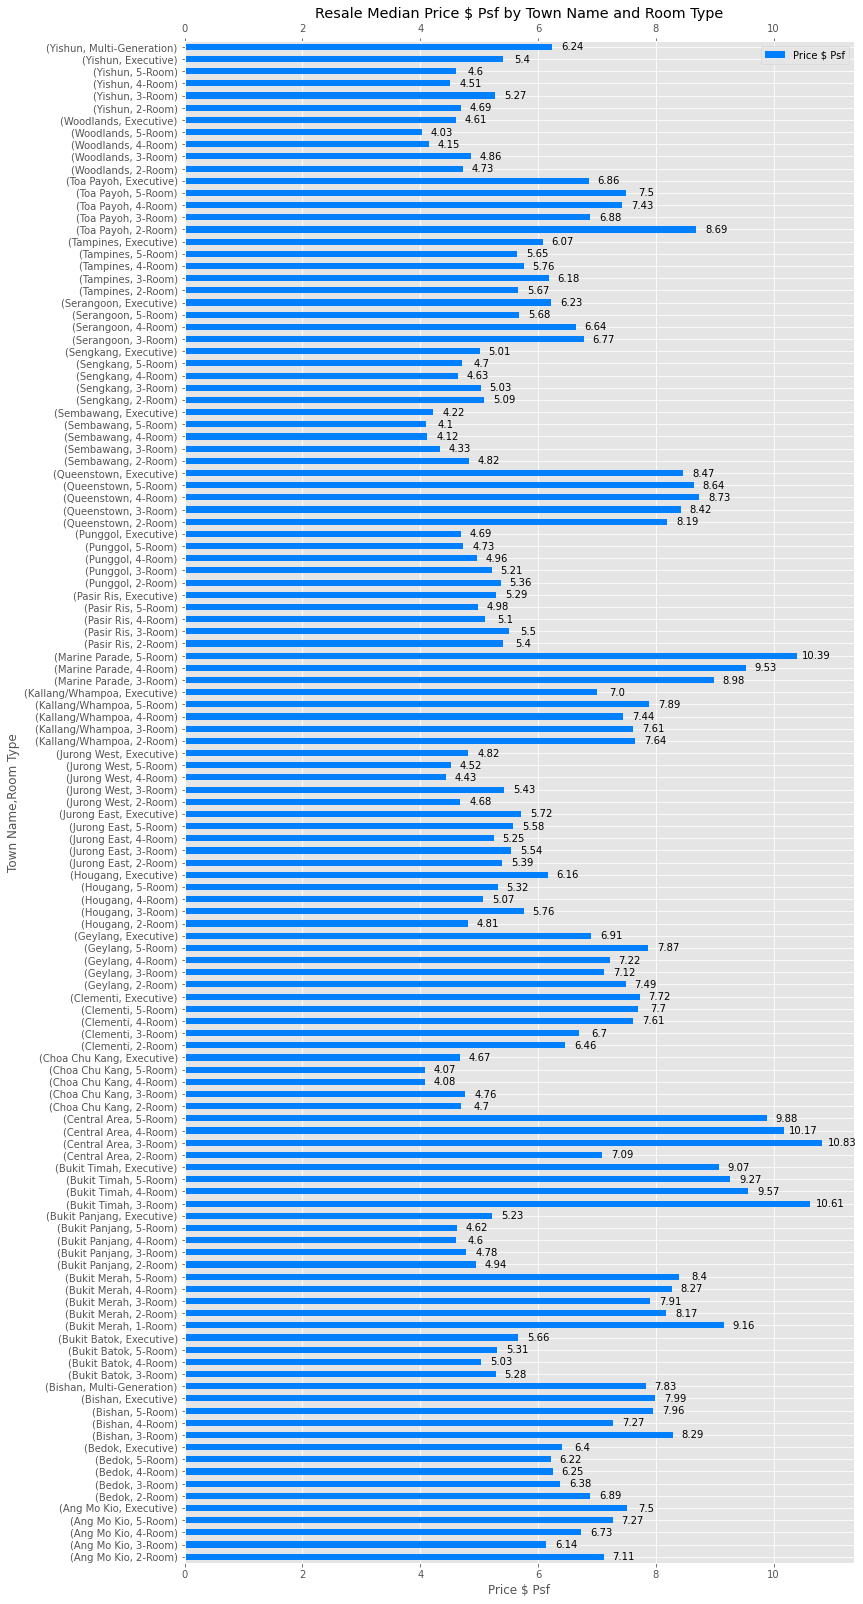

In [78]:
hdb_median_prices_remaining_lease = hdb.groupby(['Town Name','Room Type']).agg({'Price per Sqft per Remaining Lease year':'median'})
ax = hdb_median_prices_remaining_lease.plot(kind = 'barh', figsize=(12,28), color='#0080FF')
# plt.suptitle(f"Median Price psf by Town", fontsize=18)
ax.set_xlabel("Price $ Psf", fontsize=12)
ax.set_title(f'Resale Median Price $ Psf by Town Name and Room Type')
ax.tick_params(axis="x", bottom=True, top=True, labelbottom=True, labeltop=True)
ax.legend(['Price $ Psf'])
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    if width > 0 and width < np.inf:
        ax.annotate(round(width,2),\
                    (x+width, y),\
                    ha='center', va='center', xytext=(20, 3), textcoords='offset points')

plt.show()

## Remaining Lease Year by Town

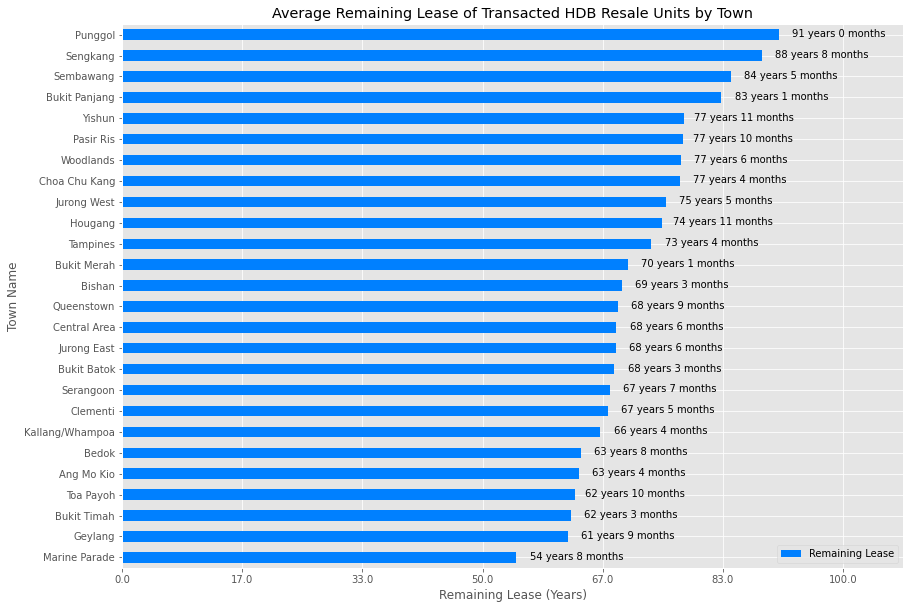

In [22]:
remaining_lease = hdb.groupby('Town Name').agg({'Remaining Lease in Months':'mean'}).reset_index()
remaining_lease['Remaining Lease in Years'] = remaining_lease['Remaining Lease in Months']//12
remaining_lease['Remaining Lease in (Months)'] = round(remaining_lease['Remaining Lease in Months']%12)
remaining_lease['Remaining Lease'] = remaining_lease['Remaining Lease in Years'].astype(int).astype(str) + ' years ' + remaining_lease['Remaining Lease in (Months)'].astype(int).astype(str) + ' months'
remaining_lease = remaining_lease.sort_values(by = 'Remaining Lease in Months')
ax = remaining_lease.plot(kind = 'barh', figsize=(14,10), color='#0080FF', x='Town Name', y='Remaining Lease in Months')
ax.set_xticklabels(np.round(np.arange(0,101,100/6)))
ax.legend(['Average Remaining Lease'])
ax.set_xlabel('Remaining Lease (Years)')
ax.set_xlim(0,1300)
cnt = 0
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    if width > 0 and width < np.inf:
        ax.annotate(remaining_lease['Remaining Lease'].iloc[cnt],\
                    (x+width+100, y+height-0.7),\
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    cnt+=1

ax.set_title(f'Average Remaining Lease of Transacted HDB Resale Units by Town')

plt.show()

## Historical HDB Resale price at Street Level

In [23]:
hdb[hdb['Town Name'] == 'Queenstown'].Street.unique()

array(['Dawson Rd', 'Ghim Moh Link', 'Mei Ling St', 'Dover Cres',
       'Strathmore Ave', 'Holland Ave', 'Holland Cl', 'Ghim Moh Rd',
       "C'wealth Dr", "C'wealth Cres", "C'wealth Cl", 'Holland Dr',
       'Stirling Rd', 'Clarence Lane', "C'wealth Ave", 'Tanglin Halt Rd',
       'Queensway', 'Dover Cl East', "Queen's Cl", 'Dover Rd'],
      dtype=object)

In [24]:
[x for x in hdb.Street.unique().tolist() if 'daw' in x.lower()]

['Dawson Rd']

In [25]:
mystreet = "C'wealth Dr"
town_street = hdb[hdb['Street'].isin([mystreet])]

In [26]:
toplot = town_street.groupby(['Town Name','Storey','Room Type']).\
agg({'Town Name':'count', 'Price':['mean','median'], 'Price per Sqm':['mean','median'],\
                                                       'Price per Sqft':['mean','median']}).reset_index()
toplot.columns = ['Town Name','Storey','Room Type','Total Units','Average Price','Median Price',\
                  'Average Price per Sqm','Median Price per Sqm',\
                  'Average Price per Sqft','Median Price per Sqft']
toplot = toplot.round({'Average Price':2,'Median Price':2,\
                  'Average Price per Sqm':2,'Median Price per Sqm':2,\
                  'Average Price per Sqft':2,'Median Price per Sqft':2})
toplot['Storey Range + Room Type'] = toplot['Storey'] + ' ' + toplot['Room Type']

toplot

,Town Name,Storey,Room Type,Total Units,Average Price,Median Price,Average Price per Sqm,Median Price per Sqm,Average Price per Sqft,Median Price per Sqft,Storey Range + Room Type
0,Queenstown,01 to 03,3-Room,3,228833.33,230500.0,3855.27,3841.67,358.16,356.90,01 to 03 3-Room
1,Queenstown,04 to 06,3-Room,7,319857.14,250000.0,5067.25,4166.67,470.76,387.09,04 to 06 3-Room
2,Queenstown,07 to 09,3-Room,8,300250.00,260000.0,4726.39,4125.00,439.09,383.22,07 to 09 3-Room
3,Queenstown,10 to 12,3-Room,3,337666.67,275000.0,5490.74,4583.33,510.10,425.80,10 to 12 3-Room
4,Queenstown,10 to 12,4-Room,1,805000.00,805000.0,8655.91,8655.91,804.15,804.15,10 to 12 4-Room
5,Queenstown,13 to 15,3-Room,2,545000.00,545000.0,8650.79,8650.79,803.68,803.68,13 to 15 3-Room
6,Queenstown,16 to 18,3-Room,2,580000.00,580000.0,9206.35,9206.35,855.29,855.29,16 to 18 3-Room
7,Queenstown,16 to 18,4-Room,2,826500.00,826500.0,8653.51,8653.51,803.93,803.93,16 to 18 4-Room
8,Queenstown,19 to 21,3-Room,1,580000.00,580000.0,9206.35,9206.35,855.29,855.29,19 to 21 3-Room
9,Queenstown,22 to 24,4-Room,1,800000.00,800000.0,9090.91,9090.91,844.57,844.57,22 to 24 4-Room


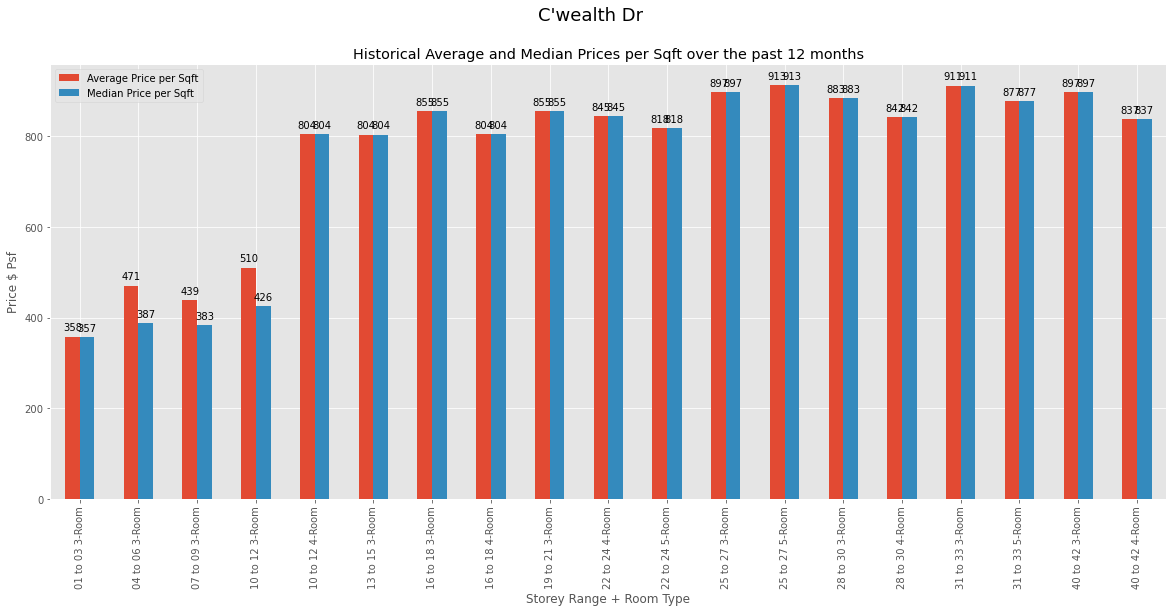

In [27]:
ax = toplot.plot(kind='bar', figsize=(20,8), x = 'Storey Range + Room Type', y=['Average Price per Sqft','Median Price per Sqft'])

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    if height > 0 and height < np.inf:
        ax.annotate(int(round(height)),\
                    (x+width/2, y+height),\
                    ha='center', va='center', xytext=(0, 9), textcoords='offset points')

plt.suptitle(f"{mystreet}", fontsize=18)
ax.set_ylabel("Price $ Psf", fontsize=12)
ax.set_title(f'Historical Average and Median Prices per Sqft over the past 12 months')
plt.show()

In [28]:
mystreet = 'Tampines Ctrl 8'
tamp = hdb[hdb['Street'].isin([mystreet])]

In [29]:
toplot = tamp.groupby(['Town Name','Storey','Room Type']).\
agg({'Town Name':'count', 'Price':['mean','median'], 'Price per Sqm':['mean','median'],\
                                                       'Price per Sqft':['mean','median']}).reset_index()
toplot.columns = ['Town Name','Storey','Room Type','Total Units','Average Price','Median Price',\
                  'Average Price per Sqm','Median Price per Sqm',\
                  'Average Price per Sqft','Median Price per Sqft']
toplot = toplot.round({'Average Price':2,'Median Price':2,\
                  'Average Price per Sqm':2,'Median Price per Sqm':2,\
                  'Average Price per Sqft':2,'Median Price per Sqft':2})
toplot['Storey Range + Room Type'] = toplot['Storey'] + ' ' + toplot['Room Type']

toplot

,Town Name,Storey,Room Type,Total Units,Average Price,Median Price,Average Price per Sqm,Median Price per Sqm,Average Price per Sqft,Median Price per Sqft,Storey Range + Room Type
0,Tampines,01 to 03,4-Room,2,572500.00,572500.0,6815.48,6815.48,633.17,633.17,01 to 03 4-Room
1,Tampines,04 to 06,3-Room,2,476000.00,476000.0,7677.42,7677.42,713.25,713.25,04 to 06 3-Room
2,Tampines,04 to 06,4-Room,6,613166.67,612500.0,7329.25,7335.41,680.90,681.48,04 to 06 4-Room
3,Tampines,04 to 06,5-Room,1,800000.00,800000.0,7407.41,7407.41,688.16,688.16,04 to 06 5-Room
4,Tampines,07 to 09,3-Room,2,505500.00,505500.0,8153.23,8153.23,757.45,757.45,07 to 09 3-Room
5,Tampines,07 to 09,4-Room,10,637588.80,638500.0,7627.18,7601.19,708.58,706.17,07 to 09 4-Room
6,Tampines,07 to 09,5-Room,1,800000.00,800000.0,7407.41,7407.41,688.16,688.16,07 to 09 5-Room
7,Tampines,10 to 12,3-Room,3,503592.00,505000.0,8122.45,8145.16,754.59,756.70,10 to 12 3-Room
8,Tampines,10 to 12,4-Room,4,665000.00,667500.0,7940.69,7976.19,737.71,741.01,10 to 12 4-Room
9,Tampines,10 to 12,5-Room,1,842000.00,842000.0,7796.30,7796.30,724.29,724.29,10 to 12 5-Room


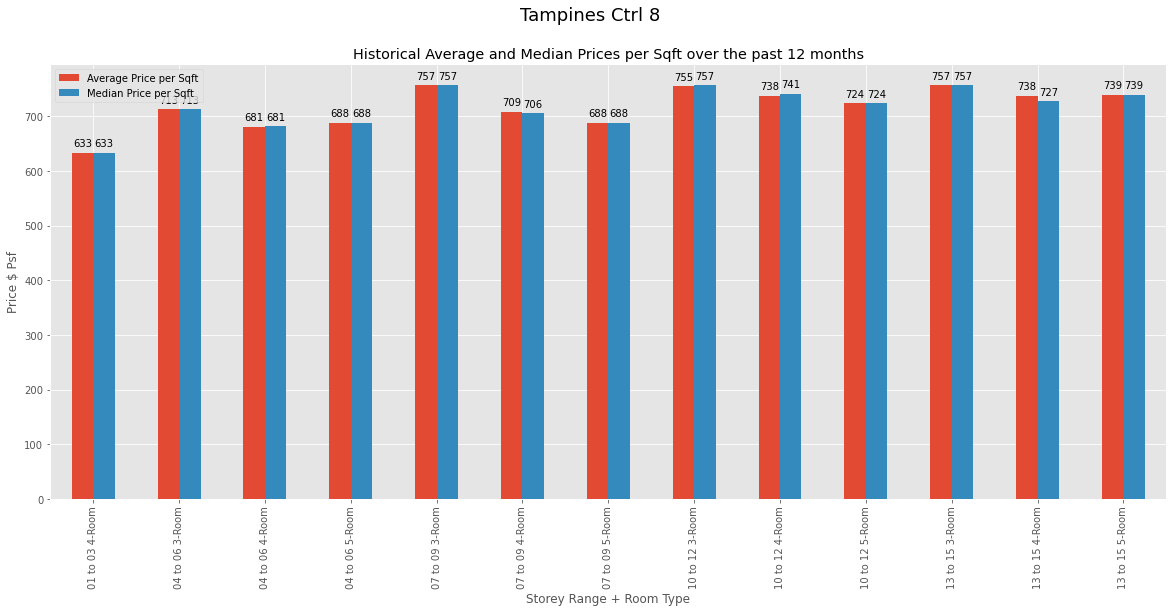

In [30]:
ax = toplot.plot(kind='bar', figsize=(20,8), x = 'Storey Range + Room Type', y=['Average Price per Sqft','Median Price per Sqft'])

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    if height > 0 and height < np.inf:
        ax.annotate(int(round(height)),\
                    (x+width/2, y+height),\
                    ha='center', va='center', xytext=(0, 9), textcoords='offset points')

plt.suptitle(f"{mystreet}", fontsize=18)
ax.set_ylabel("Price $ Psf", fontsize=12)
ax.set_title(f'Historical Average and Median Prices per Sqft over the past 12 months')
plt.show()

<a id='DBSS'>DBSS</a>

In [31]:
hdb['Model Type'].unique()

array(['Model A', 'Improved', 'Premium Apartment', 'New Generation',
       'Standard', 'Maisonette', 'Premium Apartment Loft', 'Apartment',
       'Dbss', 'Adjoined Flat', 'Simplified', 'Model A2', 'Type S2',
       'Type S1', 'Model A-Maisonette', 'Multi Generation', '2-Room',
       'Terrace', 'Improved-Maisonette', 'Premium Maisonette'],
      dtype=object)

In [32]:
dbss = hdb[hdb['Model Type']=='Dbss']

In [37]:
toplot = dbss.groupby(['Town Name','Room Type']).\
agg({'Town Name':'count', 'Price':['mean','median'], 'Price per Sqm':['mean','median'],\
                                                       'Price per Sqft':['mean','median']}).reset_index()
toplot.columns = ['Town Name','Room Type','Total Units','Average Price','Median Price',\
                  'Average Price per Sqm','Median Price per Sqm',\
                  'Average Price per Sqft','Median Price per Sqft']
toplot = toplot.round({'Average Price':2,'Median Price':2,\
                  'Average Price per Sqm':2,'Median Price per Sqm':2,\
                  'Average Price per Sqft':2,'Median Price per Sqft':2})
toplot['Town Name + Room Type'] = toplot['Town Name'] + ' ' + toplot['Room Type']

toplot

,Town Name,Room Type,Total Units,Average Price,Median Price,Average Price per Sqm,Median Price per Sqm,Average Price per Sqft,Median Price per Sqft,Town Name + Room Type
0,Ang Mo Kio,4-Room,14,729690.29,738000.0,8094.61,8200.00,752.01,761.80,Ang Mo Kio 4-Room
1,Ang Mo Kio,5-Room,22,841304.00,840000.0,7362.79,7366.07,684.02,684.32,Ang Mo Kio 5-Room
2,Bedok,3-Room,9,498444.44,500000.0,7515.43,7575.76,698.20,703.81,Bedok 3-Room
3,Bedok,4-Room,17,678705.88,670000.0,7817.73,7701.15,726.29,715.45,Bedok 4-Room
4,Bedok,5-Room,5,798400.00,790000.0,7546.84,7477.06,701.12,694.64,Bedok 5-Room
5,Bishan,4-Room,7,880269.71,888888.0,9266.00,9356.72,860.83,869.26,Bishan 4-Room
6,Bishan,5-Room,11,1001818.18,1050000.0,8348.48,8750.00,775.59,812.89,Bishan 5-Room
7,Clementi,3-Room,10,512500.00,512500.0,8541.67,8541.67,793.54,793.54,Clementi 3-Room
8,Clementi,4-Room,18,745592.56,746500.0,9192.47,9219.51,854.00,856.51,Clementi 4-Room
9,Clementi,5-Room,8,909925.00,917500.0,8665.95,8738.10,805.09,811.79,Clementi 5-Room


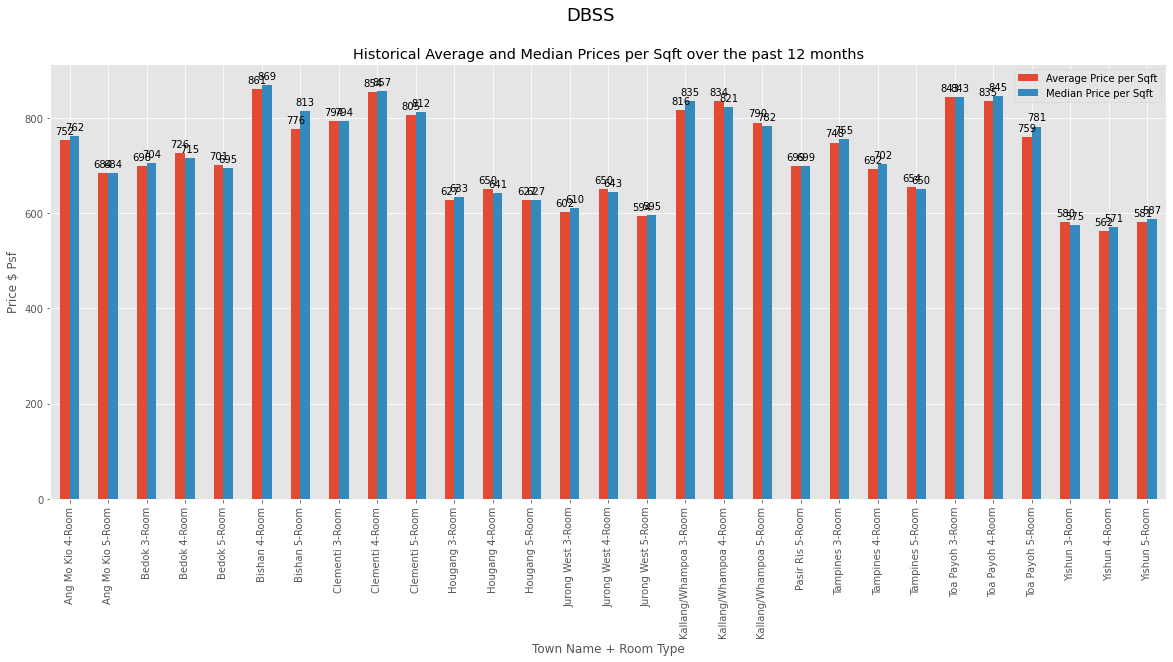

In [38]:
ax = toplot.plot(kind='bar', figsize=(20,8), x = 'Town Name + Room Type', y=['Average Price per Sqft','Median Price per Sqft'])

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    if height > 0 and height < np.inf:
        ax.annotate(int(round(height)),\
                    (x+width/2, y+height),\
                    ha='center', va='center', xytext=(0, 9), textcoords='offset points')

plt.suptitle(f"DBSS", fontsize=18)
ax.set_ylabel("Price $ Psf", fontsize=12)
ax.set_title(f'Historical Average and Median Prices per Sqft over the past 12 months')
plt.show()